In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

1990년대 9월 최고 기온 평균 : [26.9, 26.3, 26.6, 26.5, 29.4, 25.6, 28.0, 27.1, 28.0, 27.6]
2010년대 9월 최고 기온 평균 : [28.6, 27.9, 26.8, 28.0, 27.8, 25.9, 25.9, 27.0, 25.4, 27.0]
1990년대 9월 전체 최고 기온 평균 : 27.2
2010년대 9월 전체 최고 기온 평균 : 27.0


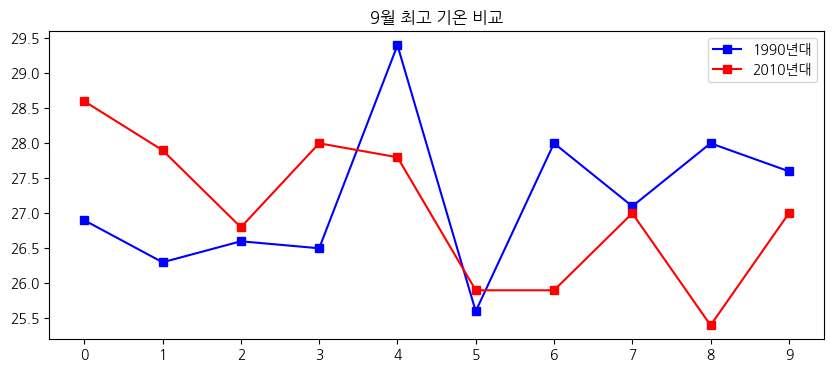

In [4]:
def draw_two_plots(title,x_data,max_temp_list1,label_y1,max_temp_list2,label_y2):

    plt.rcParams['axes.unicode_minus']=False
    plt.figure(figsize=(10,4))
    plt.plot(x_data,max_temp_list1, marker='s', markersize=6, color='b',label=label_y1)
    plt.plot(x_data,max_temp_list2, marker='s', markersize=6, color='r',label=label_y2)
    plt.xticks(x_data)

    plt.title(title)
    plt.legend()
    plt.show()

def main():
    search_month = int(input('비교할 월을 입력하세요 :'))

    weather_df=pd.read_csv('daegu-utf8-df.csv', encoding='utf-8-sig')
    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'],format='%Y-%m-%d')

    first_decade_max_temp_list = [0]*10
    second_decade_max_temp_list = [0]*10

    first_decade=1990
    second_decade=2010

    for year in range(10) :
        first_decade_df = weather_df[(weather_df['날짜'].dt.year == first_decade + year) &
                                     (weather_df['날짜'].dt.month == search_month)]
        first_decade_max_temp_list[year]=round(first_decade_df['최고기온'].mean(),1)
        second_decade_df = weather_df[(weather_df['날짜'].dt.year == second_decade + year) &
                                     (weather_df['날짜'].dt.month == search_month)]
        second_decade_max_temp_list[year]=round(second_decade_df['최고기온'].mean(),1)

    print(f'{first_decade}년대 {search_month}월 최고 기온 평균 : {first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고 기온 평균 : {second_decade_max_temp_list}')

    first_decade_high_temp_mean = round(sum(first_decade_max_temp_list) / 
                                        len(first_decade_max_temp_list),1)
    second_decade_high_temp_mean = round(sum(second_decade_max_temp_list) / 
                                        len(second_decade_max_temp_list),1)
    
    print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균 : {first_decade_high_temp_mean}')
    print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균 : {second_decade_high_temp_mean}')

    x_data=[i for i in range(10)]
    draw_two_plots(f'{search_month}월 최고 기온 비교',x_data, 
                   first_decade_max_temp_list, str(first_decade)+'년대',
                   second_decade_max_temp_list, str(second_decade)+'년대')
    
main()
